In [37]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt


### The Data 

In [49]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

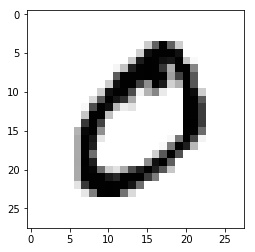

In [50]:
number=train_images[1]
plt.imshow(number, cmap=plt.cm.binary)
plt.show()


### The model

In [8]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

### compile it 

In [17]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

### Reshape the input to fit in the model

In [51]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255


test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [52]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [53]:
validation_images=train_images[:1000]
train_images=train_images[1000:]
validation_labels=train_labels[:1000]
train_labels=train_labels[1000:]

In [70]:
history=network.fit(train_images,train_labels,epochs=15,batch_size=128,
                   validation_data=(validation_images,validation_labels))

Train on 59000 samples, validate on 1000 samples
Epoch 1/15
59000/59000 [==============================] - 3s 51us/step - loss: 0.6819 - acc: 0.9567 - val_loss: 0.7309 - val_acc: 0.9520
Epoch 2/15
59000/59000 [==============================] - 3s 51us/step - loss: 0.6828 - acc: 0.9565 - val_loss: 0.7411 - val_acc: 0.9510
Epoch 3/15
59000/59000 [==============================] - 3s 51us/step - loss: 0.6835 - acc: 0.9566 - val_loss: 0.8071 - val_acc: 0.9460
Epoch 4/15
59000/59000 [==============================] - 3s 51us/step - loss: 0.6727 - acc: 0.9575 - val_loss: 0.7526 - val_acc: 0.9530
Epoch 5/15
59000/59000 [==============================] - 3s 51us/step - loss: 0.6698 - acc: 0.9573 - val_loss: 0.7246 - val_acc: 0.9550
Epoch 6/15
59000/59000 [==============================] - 3s 51us/step - loss: 0.6651 - acc: 0.9578 - val_loss: 0.7916 - val_acc: 0.9490
Epoch 7/15
59000/59000 [==============================] - 3s 51us/step - loss: 0.6569 - acc: 0.9582 - val_loss: 0.7712 - val_acc:

In [71]:
test_loss,test_acc=network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 31us/step


In [72]:
test_acc

0.9509

### History dict

In [73]:
history.history

{'val_loss': [0.7308888578414917,
  0.741101752281189,
  0.8070756478309631,
  0.75255313372612,
  0.7245666446685791,
  0.7915580420494079,
  0.7712113394737243,
  0.7844320514202118,
  0.7384102096557618,
  0.7499773850440979,
  0.7451902542114258,
  0.7737167432308197,
  0.7542434148788452,
  0.711904304265976,
  0.7319621186256409],
 'val_acc': [0.9519999995231628,
  0.9510000009536743,
  0.9459999995231628,
  0.9530000009536743,
  0.9549999971389771,
  0.9489999971389771,
  0.9509999971389771,
  0.9490000009536743,
  0.9520000009536743,
  0.9519999971389771,
  0.9519999971389771,
  0.9500000009536743,
  0.9520000009536743,
  0.9539999985694885,
  0.9540000009536743],
 'loss': [0.6819167084936368,
  0.6828202351877245,
  0.6835492898730908,
  0.6726677754935572,
  0.669797169539888,
  0.665144144228115,
  0.656864813087179,
  0.6529012612115466,
  0.6531818150221291,
  0.6400896923501613,
  0.6364374287451728,
  0.6382399588621269,
  0.6335695848141686,
  0.6297997236251831,
  0.62

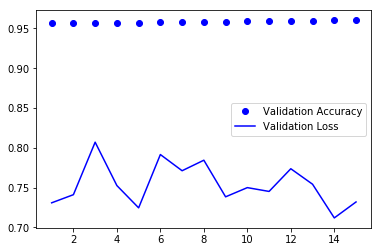

In [74]:

epoches=range(1,len(history.history['acc'])+1)
plt.plot(epoches,history.history['acc'],'bo',label='Validation Accuracy')
plt.plot(epoches,history.history['val_loss'],'b',label='Validation Loss')
plt.legend()

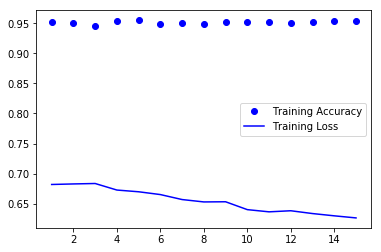

In [75]:
plt.plot(epoches,history.history['val_acc'],'bo',label='Training Accuracy')
plt.plot(epoches,history.history['loss'],'b',label='Training Loss')
plt.legend()